In [247]:
!pip install tensorflow_decision_forests
!wget -O 230.csv "https://drive.google.com/uc?export=download&id=1V2YsUcq0gI6vtjuOsnbFhz4Em4wjLKa6"
!wget -O 221.csv "https://drive.google.com/uc?export=download&id=1k5zUjhT-oyKUuN8o7yBHdJ6BY3gerd2X"

--2024-09-17 19:06:02--  https://drive.google.com/uc?export=download&id=1V2YsUcq0gI6vtjuOsnbFhz4Em4wjLKa6
Resolving drive.google.com (drive.google.com)... 142.250.141.113, 142.250.141.101, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1V2YsUcq0gI6vtjuOsnbFhz4Em4wjLKa6&export=download [following]
--2024-09-17 19:06:02--  https://drive.usercontent.google.com/download?id=1V2YsUcq0gI6vtjuOsnbFhz4Em4wjLKa6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525070 (513K) [application/octet-stream]
Saving to: ‘230.csv’

230.csv             100%[===================>] 512.76K  --.-KB/s  

In [248]:
#imports
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tf_keras
import math
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#Setting up the Data for Paitent 1 and Paitent 2

In [249]:
# Setting up the data and cleaning it
patient_221 = pd.read_csv('221.csv')
patient_230 = pd.read_csv('230.csv')

print(patient_221.dtypes)
print(patient_230.dtypes)

print(patient_221.describe())
print(patient_230.describe())

print(patient_221.shape)
print(patient_230.shape)

RESP       int64
BP-S       int64
BP-D       int64
SpO2       int64
HR         int64
PULSE      int64
Anomaly    int64
dtype: object
RESP       int64
BP-S       int64
BP-D       int64
SpO2       int64
HR         int64
PULSE      int64
Anomaly    int64
dtype: object
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE   

#Visualising the Data and Cleaning It

The no. of missing values in each column for Patient 221 are: 
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64
The shape of the dataset for Patient 1 after removing the duplicates is: 
(24999, 7)
The no. of missing values in each column for Patient 230 are: 
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64
The shape of the dataset for Patient 2 after removing the duplicates is: 
(25000, 7)


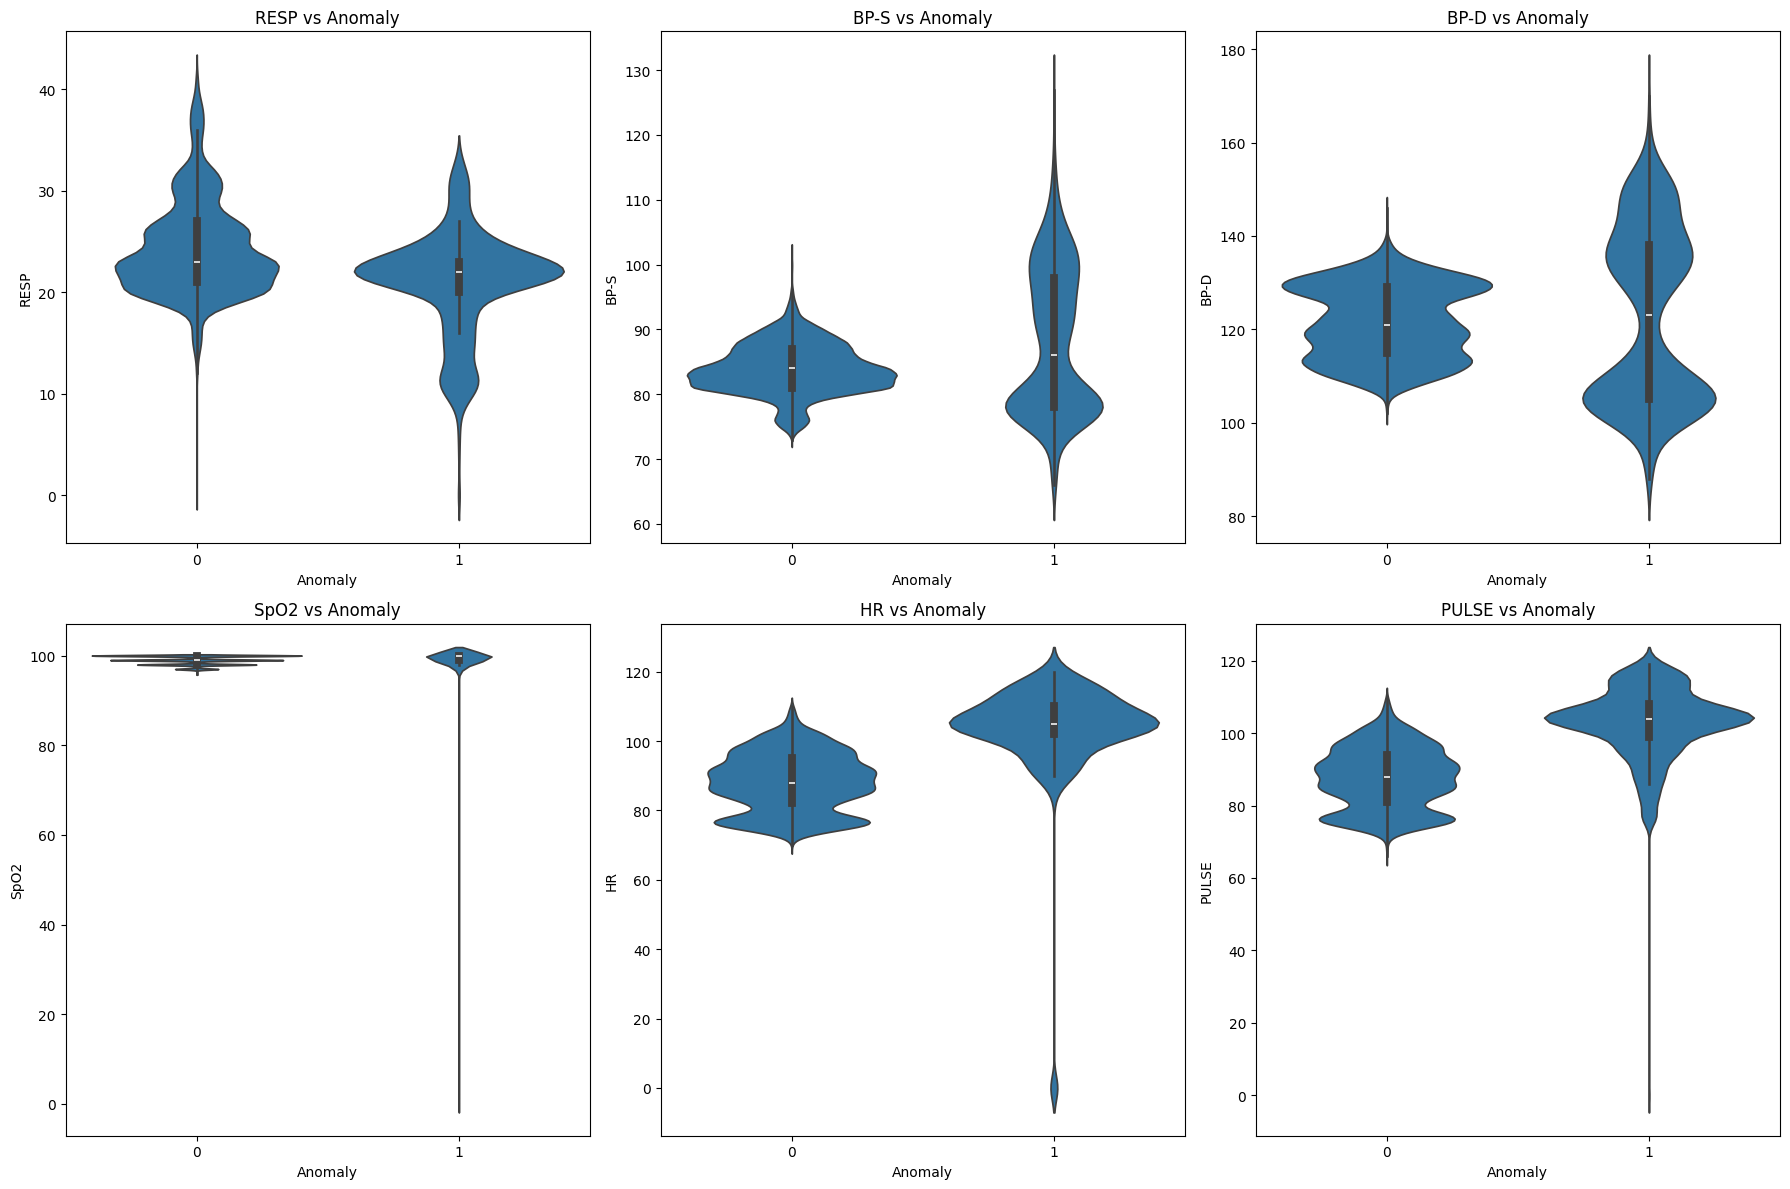

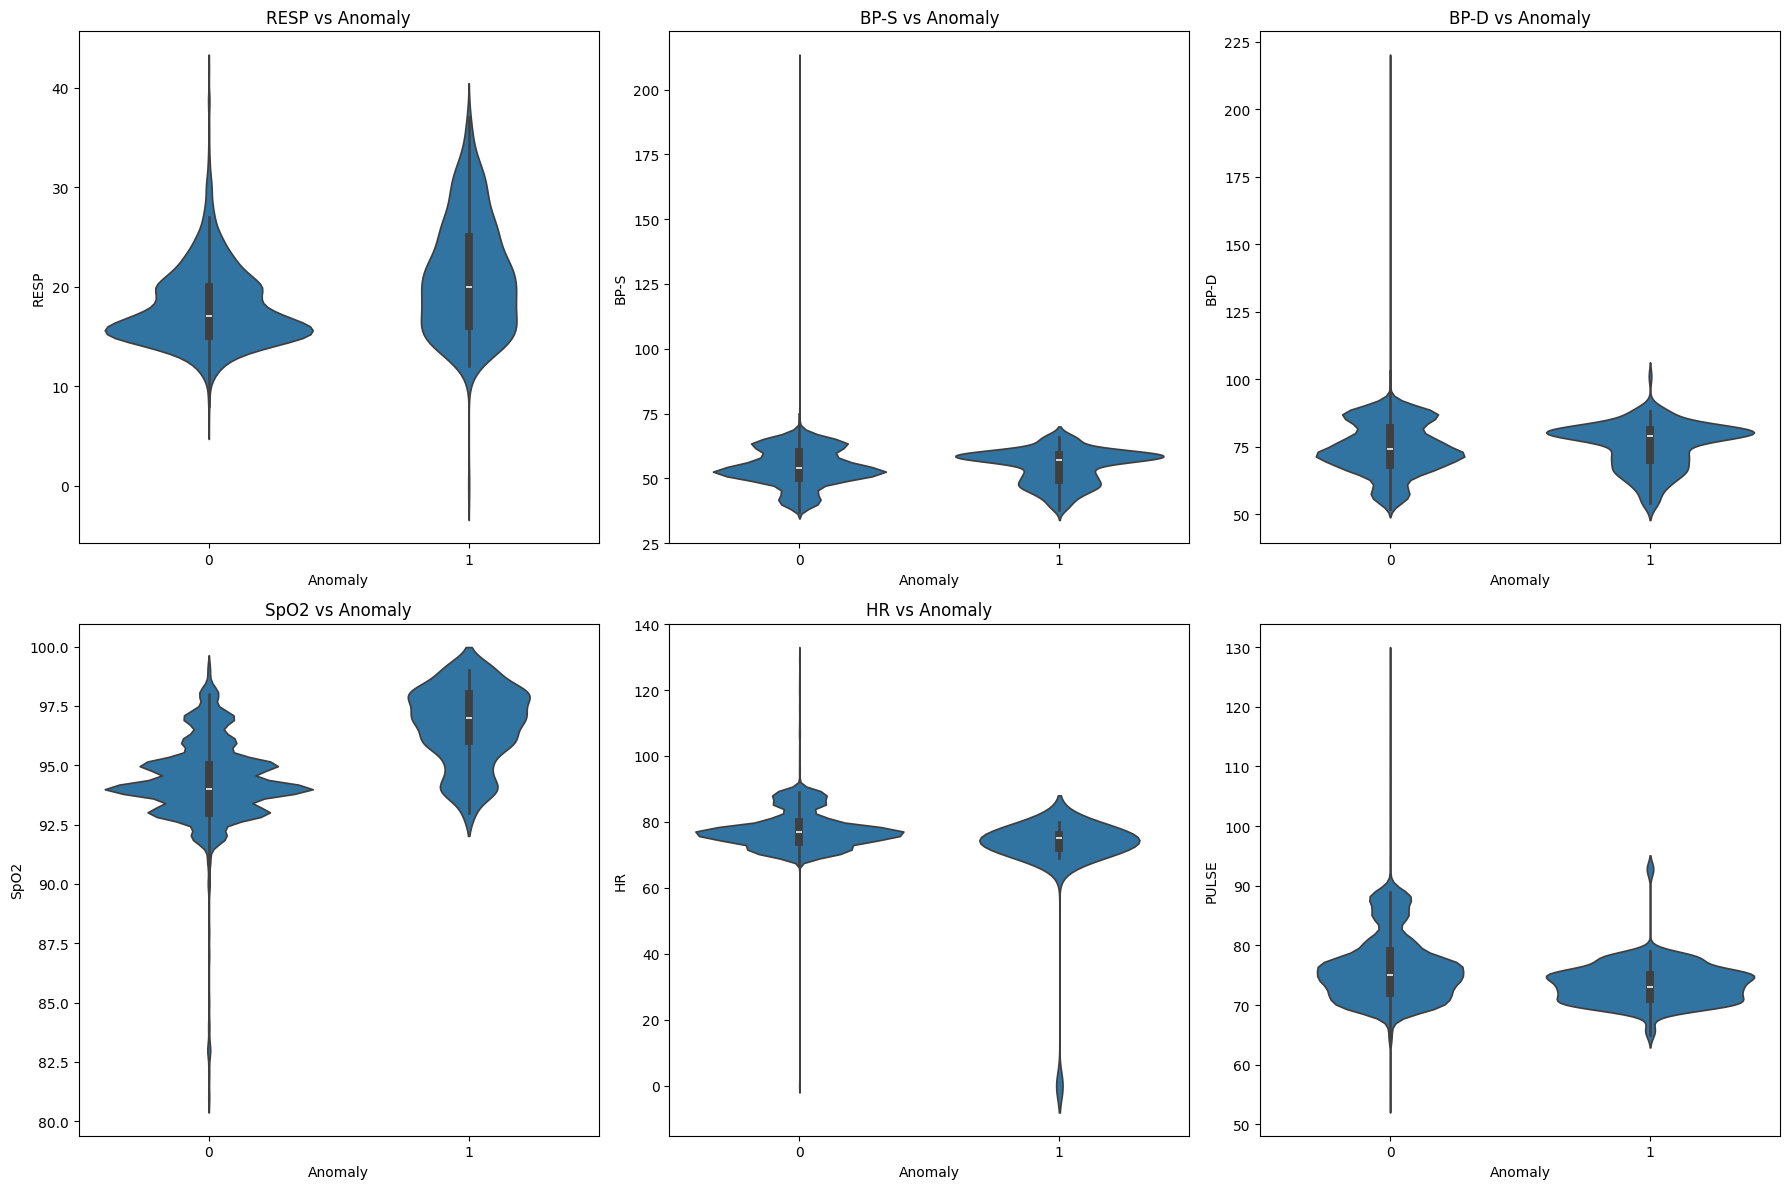

Since we have cleaned our dataset of any duplicates or missing values, we can proceed to fit the dataframe to the required decision trees.


In [250]:
#Removing any duplicated and missing values for Patient 1
missing_values_1 = patient_221.isna().sum()
print("The no. of missing values in each column for Patient 221 are: ")
print(missing_values_1)
patient_221_cleaned = patient_221.drop_duplicates()
# patient_221_cleaned.dropna(inplace=True)
# patient_221_cleaned.reset_index(drop=True,inplace=True)
print("The shape of the dataset for Patient 1 after removing the duplicates is: ")
print(patient_221.shape)

#Removing any duplicated and missing values for Patient 2
missing_values_2 = patient_230.isna().sum()
print("The no. of missing values in each column for Patient 230 are: ")
print(missing_values_2)
patient_230_cleaned = patient_230.drop_duplicates()
print("The shape of the dataset for Patient 2 after removing the duplicates is: ")
print(patient_230.shape)

#Violin Plot for Patient 1
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

# 1. Violin plot of RESP
plt.subplot(2, 3, 1)
sns.violinplot(x='Anomaly', y='RESP', data=patient_221_cleaned)
plt.title('RESP vs Anomaly')

# 2. Violin plot of BP-S
plt.subplot(2, 3, 2)
sns.violinplot(x='Anomaly', y='BP-S', data=patient_221_cleaned)
plt.title('BP-S vs Anomaly')

# 3. Violin plot of BP-D
plt.subplot(2, 3, 3)
sns.violinplot(x='Anomaly', y='BP-D', data=patient_221_cleaned)
plt.title('BP-D vs Anomaly')

# 4. Violin plot of SpO2
plt.subplot(2, 3, 4)
sns.violinplot(x='Anomaly', y='SpO2', data=patient_221_cleaned)
plt.title('SpO2 vs Anomaly')

# 5. Violin plot of HR
plt.subplot(2, 3, 5)
sns.violinplot(x='Anomaly', y='HR', data=patient_221_cleaned)
plt.title('HR vs Anomaly')

# 6. Violin plot of PULSE
plt.subplot(2, 3, 6)
sns.violinplot(x='Anomaly', y='PULSE', data=patient_221_cleaned)
plt.title('PULSE vs Anomaly')

# Adjust the layout
plt.tight_layout()
plt.show()


#Violin Plot for Patient 2
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))

# 1. Violin plot of RESP
plt.subplot(2, 3, 1)
sns.violinplot(x='Anomaly', y='RESP', data=patient_230_cleaned)
plt.title('RESP vs Anomaly')

# 2. Violin plot of BP-S
plt.subplot(2, 3, 2)
sns.violinplot(x='Anomaly', y='BP-S', data=patient_230_cleaned)
plt.title('BP-S vs Anomaly')

# 3. Violin plot of BP-D
plt.subplot(2, 3, 3)
sns.violinplot(x='Anomaly', y='BP-D', data=patient_230_cleaned)
plt.title('BP-D vs Anomaly')

# 4. Violin plot of SpO2
plt.subplot(2, 3, 4)
sns.violinplot(x='Anomaly', y='SpO2', data=patient_230_cleaned)
plt.title('SpO2 vs Anomaly')

# 5. Violin plot of HR
plt.subplot(2, 3, 5)
sns.violinplot(x='Anomaly', y='HR', data=patient_230_cleaned)
plt.title('HR vs Anomaly')

# 6. Violin plot of PULSE
plt.subplot(2, 3, 6)
sns.violinplot(x='Anomaly', y='PULSE', data=patient_230_cleaned)

# Adjust the layout
plt.tight_layout()
plt.show()

print("Since we have cleaned our dataset of any duplicates or missing values, we can proceed to fit the dataframe to the required decision trees.")

# 1)A) Fitting the inbuilt ID3 model

In [251]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = patient_221_cleaned.drop(columns=["Anomaly"])
Y = patient_221_cleaned["Anomaly"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state = 69)

classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)
Y_prediction = classifier.predict(X_test)

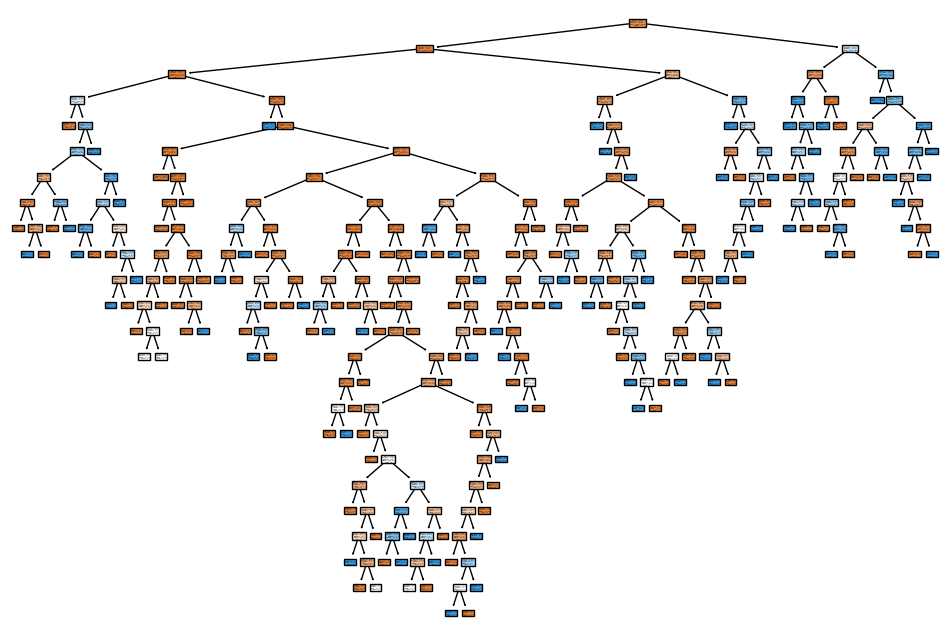

In [252]:
given_class_names = [str(class_names) for class_names in Y.unique()]
plt.figure(figsize=(12,8))
tree.plot_tree(classifier, filled=True, feature_names = list(patient_221_cleaned.columns), class_names = given_class_names)
plt.show()

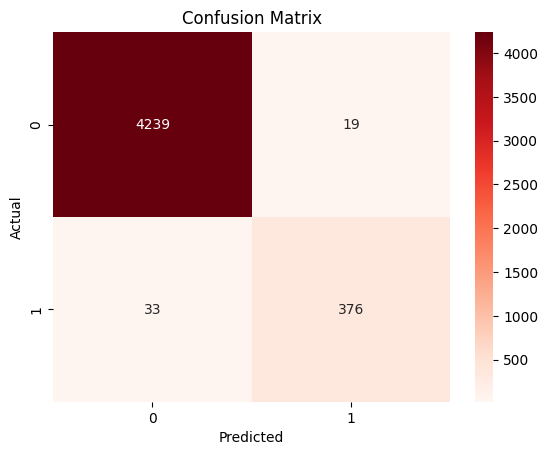

The accuracy of the inbuilt ID3 decision tree algorithm is: 98.89%
Accuracy is : 98.89%


In [253]:
from sklearn.metrics import confusion_matrix

#We now plot the confusion matrix and use it to ascertain the accuracy of our ID3 classifier.

conf_mat = confusion_matrix(Y_test, Y_prediction)
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score
accuracy_of_inbuilt_ID3 = accuracy_score(Y_prediction, Y_test)
print(f"The accuracy of the inbuilt ID3 decision tree algorithm is: {accuracy_of_inbuilt_ID3 * 100:.2f}%")
print(f"Accuracy is : {accuracy_of_inbuilt_ID3 * 100:.2f}%")

#1)B) Custom Implementation of ID3

In [254]:
# Helper function to calculate entropy
def entropy(data):
    labels = data.iloc[:, -1]  # Assuming the last column is the target
    label_counts = labels.value_counts()
    total = len(labels)
    entropy_value = sum((-count/total) * math.log2(count/total) for count in label_counts)
    return entropy_value

# Helper function to calculate information gain for a specific threshold split
def information_gain_threshold(data, feature, threshold):
    total_entropy = entropy(data)

    # Splitting the dataset based on the threshold
    subset_left = data[data[feature] <= threshold]
    subset_right = data[data[feature] > threshold]

    # Calculate weighted entropy for the split
    prob_left = len(subset_left) / len(data)
    prob_right = len(subset_right) / len(data)

    weighted_entropy = (prob_left * entropy(subset_left)) + (prob_right * entropy(subset_right))

    return total_entropy - weighted_entropy

# Helper function to find the best threshold for a numeric feature
def best_threshold(data, feature):
    # Sort the feature values and try all potential thresholds (midpoints between consecutive values)
    sorted_data = data.sort_values(by=feature)
    unique_values = sorted_data[feature].unique()

    # Try all possible splits
    best_gain = -1
    best_thresh = None
    for i in range(1, len(unique_values)):
        threshold = (unique_values[i - 1] + unique_values[i]) / 2
        gain = information_gain_threshold(data, feature, threshold)
        if gain > best_gain:
            best_gain = gain
            best_thresh = threshold

    return best_thresh, best_gain

# Function to build the ID3 tree with thresholds for numeric features
def id3_with_thresholds(data, features, depth=0, max_depth=None):
    labels = data.iloc[:, -1]

    # If all labels are the same, return that label
    if len(labels.unique()) == 1:
        return labels.iloc[0]

    # If no features are left or max depth reached, return majority label
    if len(features) == 0 or (max_depth is not None and depth >= max_depth):
        return labels.mode()[0]

    # Find the best feature and threshold to split on
    best_feature = None
    best_thresh = None
    best_gain = -1

    for feature in features:
        threshold, gain = best_threshold(data, feature)
        if gain > best_gain:
            best_feature = feature
            best_thresh = threshold
            best_gain = gain

    if best_feature is None:
        return labels.mode()[0]

    # Create a tree node
    tree = {f"{best_feature}": {}}

    # Split the dataset based on the best threshold
    subset_left = data[data[best_feature] <= best_thresh]
    subset_right = data[data[best_feature] > best_thresh]

    # Recursively build the tree
    remaining_features = features.copy()
    remaining_features.remove(best_feature)

    left_subtree = id3_with_thresholds(subset_left, remaining_features, depth+1, max_depth)
    right_subtree = id3_with_thresholds(subset_right, remaining_features, depth+1, max_depth)

    if left_subtree == right_subtree:
        return left_subtree

    tree[f"{best_feature}"][f"<= {best_thresh:.2f}"] = left_subtree
    tree[f"{best_feature}"][f"> {best_thresh:.2f}"] = right_subtree

    return tree

# Sample function to use ID3 on a pandas dataframe with thresholds
def fit_decision_tree_with_thresholds(data, max_depth=None):
    features = list(data.columns[:-1])  # All columns except the target
    return id3_with_thresholds(data, features, max_depth=max_depth)

In [255]:
from graphviz import Digraph
from IPython.display import Image, display

# Helper function to visualize tree using Graphviz with unique identifiers for nodes and leaves
def visualize_tree_with_threshold(tree, graph=None, parent=None, label=None, node_id=0):
    if graph is None:
        graph = Digraph(format='png')

    # Leaf
    if not isinstance(tree, dict):
        graph.node(str(node_id), f"Class: {tree}")
        if parent is not None:
          graph.edge(parent, str(node_id), label=label)
        return graph

    for key, value in tree.items():
        node_label = f'{key}'

        # Create a unique identifier for the current node
        current_node_id = str(node_id)
        graph.node(current_node_id, node_label)  # Define the node for the decision condition

        # Add an edge from the parent to this node (if there is a parent)
        if parent is not None:
          graph.edge(parent, current_node_id, label=label)

        if isinstance(value, dict):
            # Recur for subtrees
            i = 0
            arr = [node_id*2+1,node_id*2+2]
            for val, subtree in value.items():
              if i > 2:
                break
              node_id = arr[i]
              graph = visualize_tree_with_threshold(subtree, graph, current_node_id, str(val), node_id)
              i += 1

        break

    return graph

# Example usage of the visualization function
def display_tree_with_threshold(tree):
    graph = visualize_tree_with_threshold(tree)
    return graph

In [256]:
def predict(tree, data_row):
    for feature, branches in tree.items():
        feature_value = data_row[feature]  # Get the feature value from the row

        for condition, subtree in branches.items():
            # Extract threshold and direction from condition (e.g., "<= 14.00" or "> 14.00")
            threshold = float(condition[3:])
            direction = condition[:2]

            # Check the condition (<= or >)
            if direction == '<=' and feature_value <= threshold:
                if isinstance(subtree, dict):
                    # Recur if subtree is a dictionary (more decisions)
                    return predict(subtree, data_row)
                else:
                    # Return the class if subtree is a leaf
                    return subtree
            elif direction == '> ' and feature_value > threshold:
                if isinstance(subtree, dict):
                    # Recur if subtree is a dictionary (more decisions)
                    return predict(subtree, data_row)
                else:
                    # Return the class if subtree is a leaf
                    return subtree
    return None  # In case no valid prediction is made (shouldn't happen with a well-formed tree)

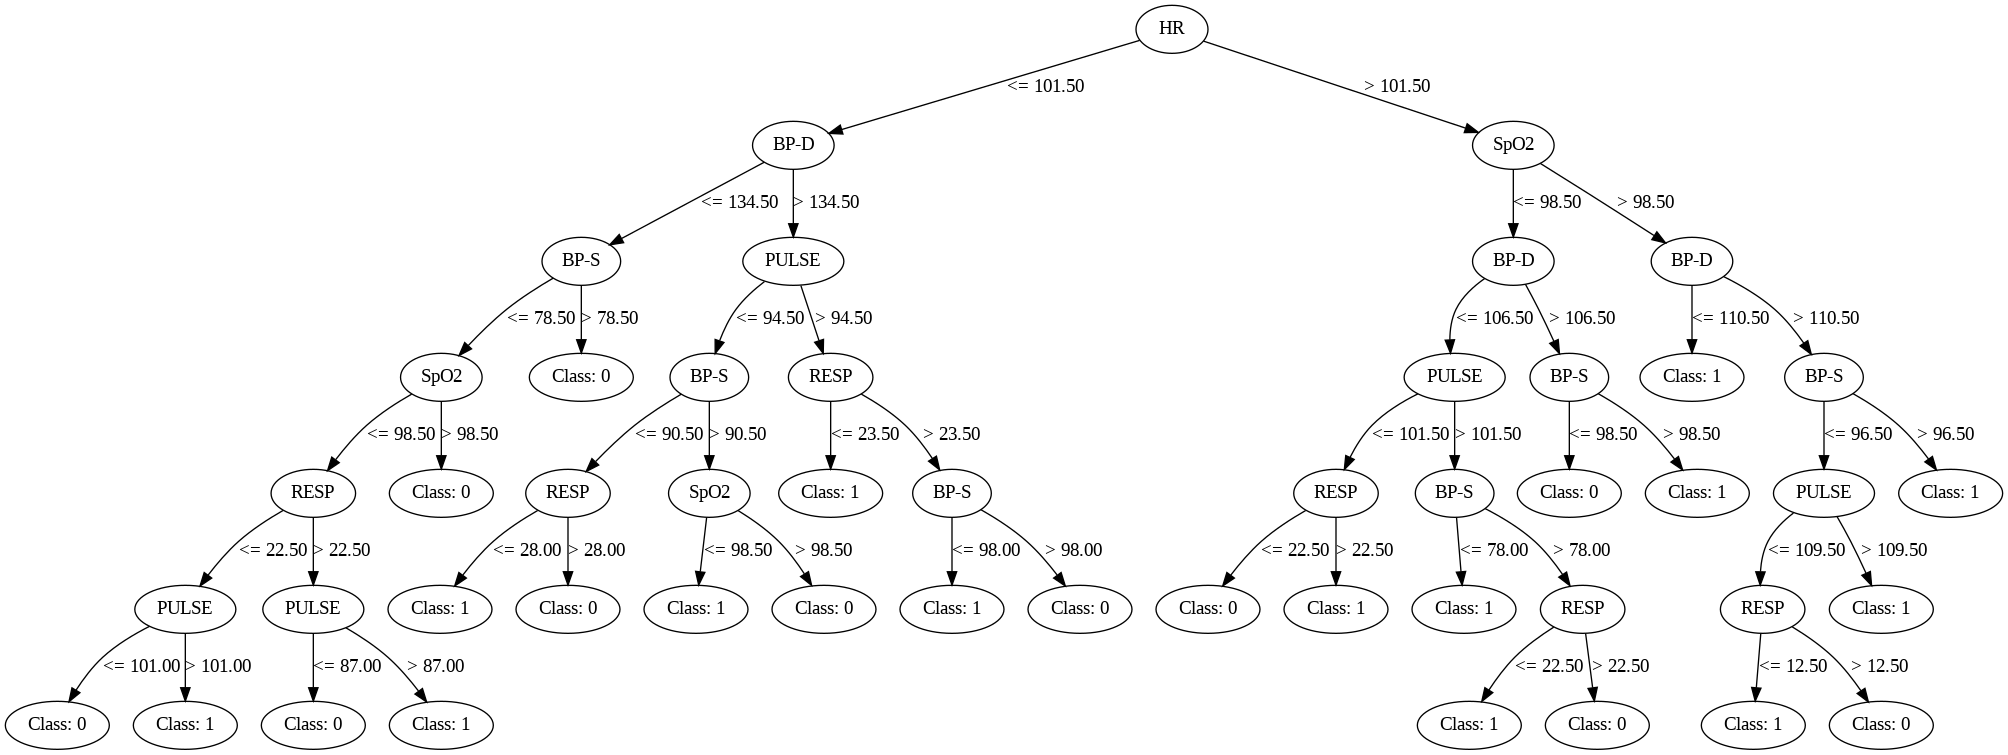

In [257]:
data = pd.read_csv('221.csv')
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

tree_custom = fit_decision_tree_with_thresholds(train_data)

# Visualize the decision tree
graph = display_tree_with_threshold(tree_custom)
graph.render('tree')  # This saves the image as 'tree.png'
display(Image(filename='tree.png'))  # Display the image

Accuracy Percentage: 98.22


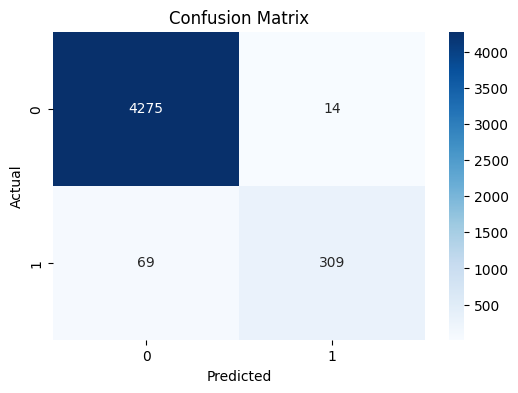

In [258]:
# Make predictions
test_data['Predicted'] = test_data.apply(lambda row: predict(tree_custom, row), axis=1)
# print(data)

# Extract the actual and predicted labels
y_true = test_data['Anomaly']
y_pred = test_data['Predicted']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print accuracy
print(f'Accuracy Percentage: {100 * accuracy:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#2)A) Implementing CART using Scikit's Decision Tree Classifier

In [259]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_CART = patient_230_cleaned.drop(columns = 'Anomaly')
Y_CART = patient_230_cleaned['Anomaly']

X_CART_train, X_CART_test, Y_CART_train, Y_CART_test = train_test_split(X_CART, Y_CART, train_size = 0.7, random_state = 69)

classifier_CART = DecisionTreeClassifier(criterion='gini', random_state = 69)
classifier_CART.fit(X_CART_train, Y_CART_train)
Y_prediction_CART = classifier_CART.predict(X_CART_test)

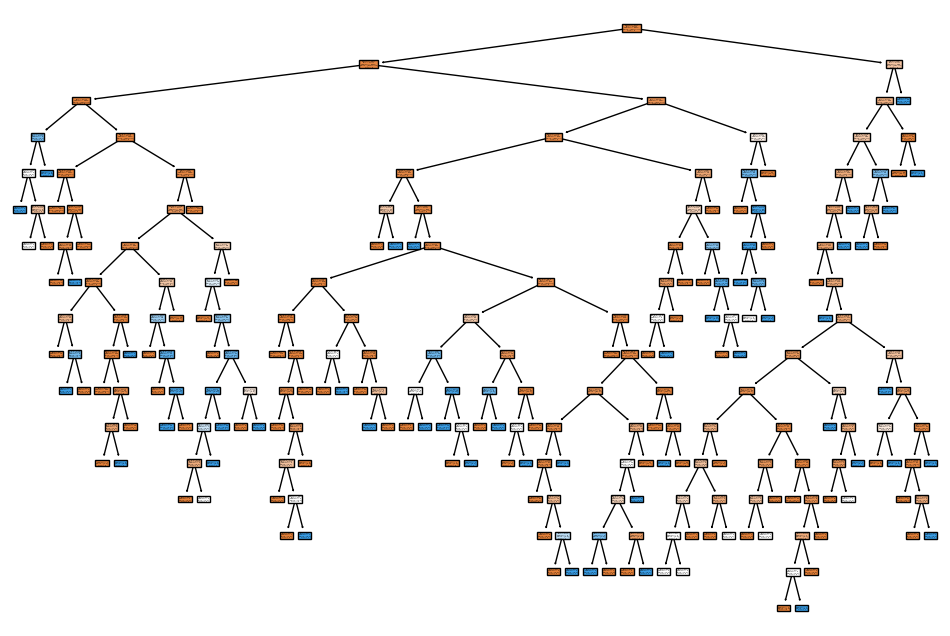

In [260]:
given_class_names_CART = [str(class_names_CART) for class_names_CART in Y_CART.unique()]
plt.figure(figsize=(12,8))
tree.plot_tree(classifier_CART, filled=True, feature_names = list(patient_230_cleaned.columns), class_names = given_class_names_CART)
plt.show()

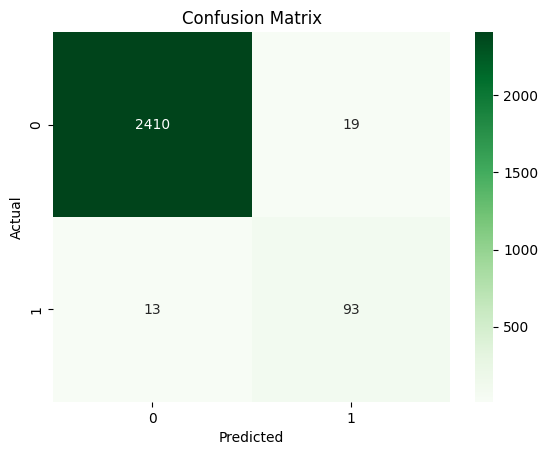

The accuracy of the inbuilt ID3 decision tree algorithm is: 98.74%
Accuracy is : 98.74%


In [261]:
from sklearn.metrics import confusion_matrix

#We now plot the confusion matrix and use it to ascertain the accuracy of our CART using SciKit classifier.

conf_mat_CART = confusion_matrix(Y_CART_test, Y_prediction_CART)
sns.heatmap(conf_mat_CART, annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score
accuracy_of_CART_using_SciKit = accuracy_score(Y_prediction_CART, Y_CART_test)
print(f"The accuracy of the inbuilt ID3 decision tree algorithm is: {accuracy_of_CART_using_SciKit * 100:.2f}%")
print(f"Accuracy is : {accuracy_of_CART_using_SciKit * 100:.2f}%")

#2)B) Implementing CART using Tensorflow's CART Model

In [262]:
from sklearn.model_selection import train_test_split

train_CART_tf = tf.data.Dataset.from_tensor_slices((X_CART_train, Y_CART_train)).batch(400)
test_CART_tf = tf.data.Dataset.from_tensor_slices((X_CART_test, Y_CART_test)).batch(400)

CART_using_tf = tfdf.keras.CartModel()
CART_using_tf.fit(train_CART_tf)

prediction_CART_tf = CART_using_tf.predict(test_CART_tf)

Use /tmp/tmpkbblx1pg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.508139. Found 5914 examples.
Training model...
Model trained in 0:00:00.051831
Compiling model...
Model compiled.
7/7 [==============================] - 0s 15ms/step


In [263]:
Y_prediction_CART_tf = CART_using_tf.predict(X_CART_test)
Y_prediction_CART_tf_2 = np.round(Y_prediction_CART_tf)

accuracy_CART_tf = accuracy_score(Y_CART_test, Y_prediction_CART_tf_2)
print(f"Accuracy is: {accuracy_CART_tf * 100:.2f}%")

80/80 [==============================] - 1s 7ms/step
Accuracy is: 97.79%


In [264]:
evaluation_CART_using_tf = CART_using_tf.evaluate(test_CART_tf)
print(evaluation_CART_using_tf)
CART_using_tf.summary()

7/7 [==============================] - 0s 12ms/step - loss: 0.0000e+00
0.0
Model: "cart_model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (6):
	data:0.0
	data:0.1
	data:0.2
	data:0.3
	data:0.4
	data:0.5

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "data:0.3"  1.000000 ################
    2. "data:0.2"  0.284091 #
    3. "data:0.0"  0.257732 #
    4. "data:0.1"  0.247525 #
    5. "data:0.5"  0.193798 
    6. "data:0.4"  0.190840 

Variable Importance: NUM_AS_ROOT:
    1. "data:0.3"  1.000000 

Variable Importance: NUM_NODES:
    1. "data:0.2"  6.000000 ################
    2. "data:0.5"  6.000000 ################
    3. "data:0.1"  4.000000 ######

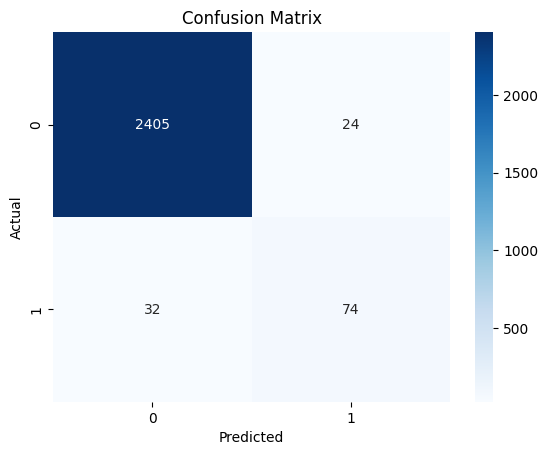

In [265]:
confusion_matrix_CART_tf = confusion_matrix(Y_CART_test, Y_prediction_CART_tf_2)
sns.heatmap(confusion_matrix_CART_tf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Training a Random Forest Model

In [266]:
from sklearn.model_selection import train_test_split
train_dataframe_rf, test_dataframe_rf = train_test_split(patient_221_cleaned, train_size = 0.7, random_state = 69)

train_dataset_rf = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataframe_rf,label="Anomaly")
test_dataset_rf = tfdf.keras.pd_dataframe_to_tf_dataset(test_dataframe_rf,label="Anomaly")

randomforest_model = tfdf.keras.RandomForestModel()
randomforest_model.fit(train_dataset_rf)

Use /tmp/tmpf6v5fldg as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.887004. Found 10887 examples.
Training model...
Model trained in 0:00:05.954673
Compiling model...
Model compiled.


In [267]:
from sklearn.metrics import log_loss
prediction_prob_rf = randomforest_model.predict(test_dataset_rf)
y_prediction_prob_rf = tf.argmax(prediction_prob_rf, axis = 1)

y_test_rf = np.concatenate([y for x, y in test_dataset_rf], axis=0)

#Calculating Accuracy and Log Loss

randomforest_accuracy = accuracy_score(y_test_rf, y_prediction_prob_rf)
print(f"Accuracy is: {randomforest_accuracy * 100:.2f}%")

randomforest_logloss =log_loss(y_test_rf, prediction_prob_rf)
print(f"Log Loss: {randomforest_logloss:.4f}")

5/5 [==============================] - 1s 65ms/step
Accuracy is: 91.24%
Log Loss: 0.0251


In [268]:
evaluation_randomforest = randomforest_model.evaluate(test_dataset_rf)
print(evaluation_randomforest)

5/5 [==============================] - 0s 58ms/step - loss: 0.0000e+00
0.0


In [269]:
tfdf.model_plotter.plot_model_in_colab(randomforest_model, tree_idx = 0, max_depth = 3)

#Visualising Hypothesis Space by producing Scatter Plots

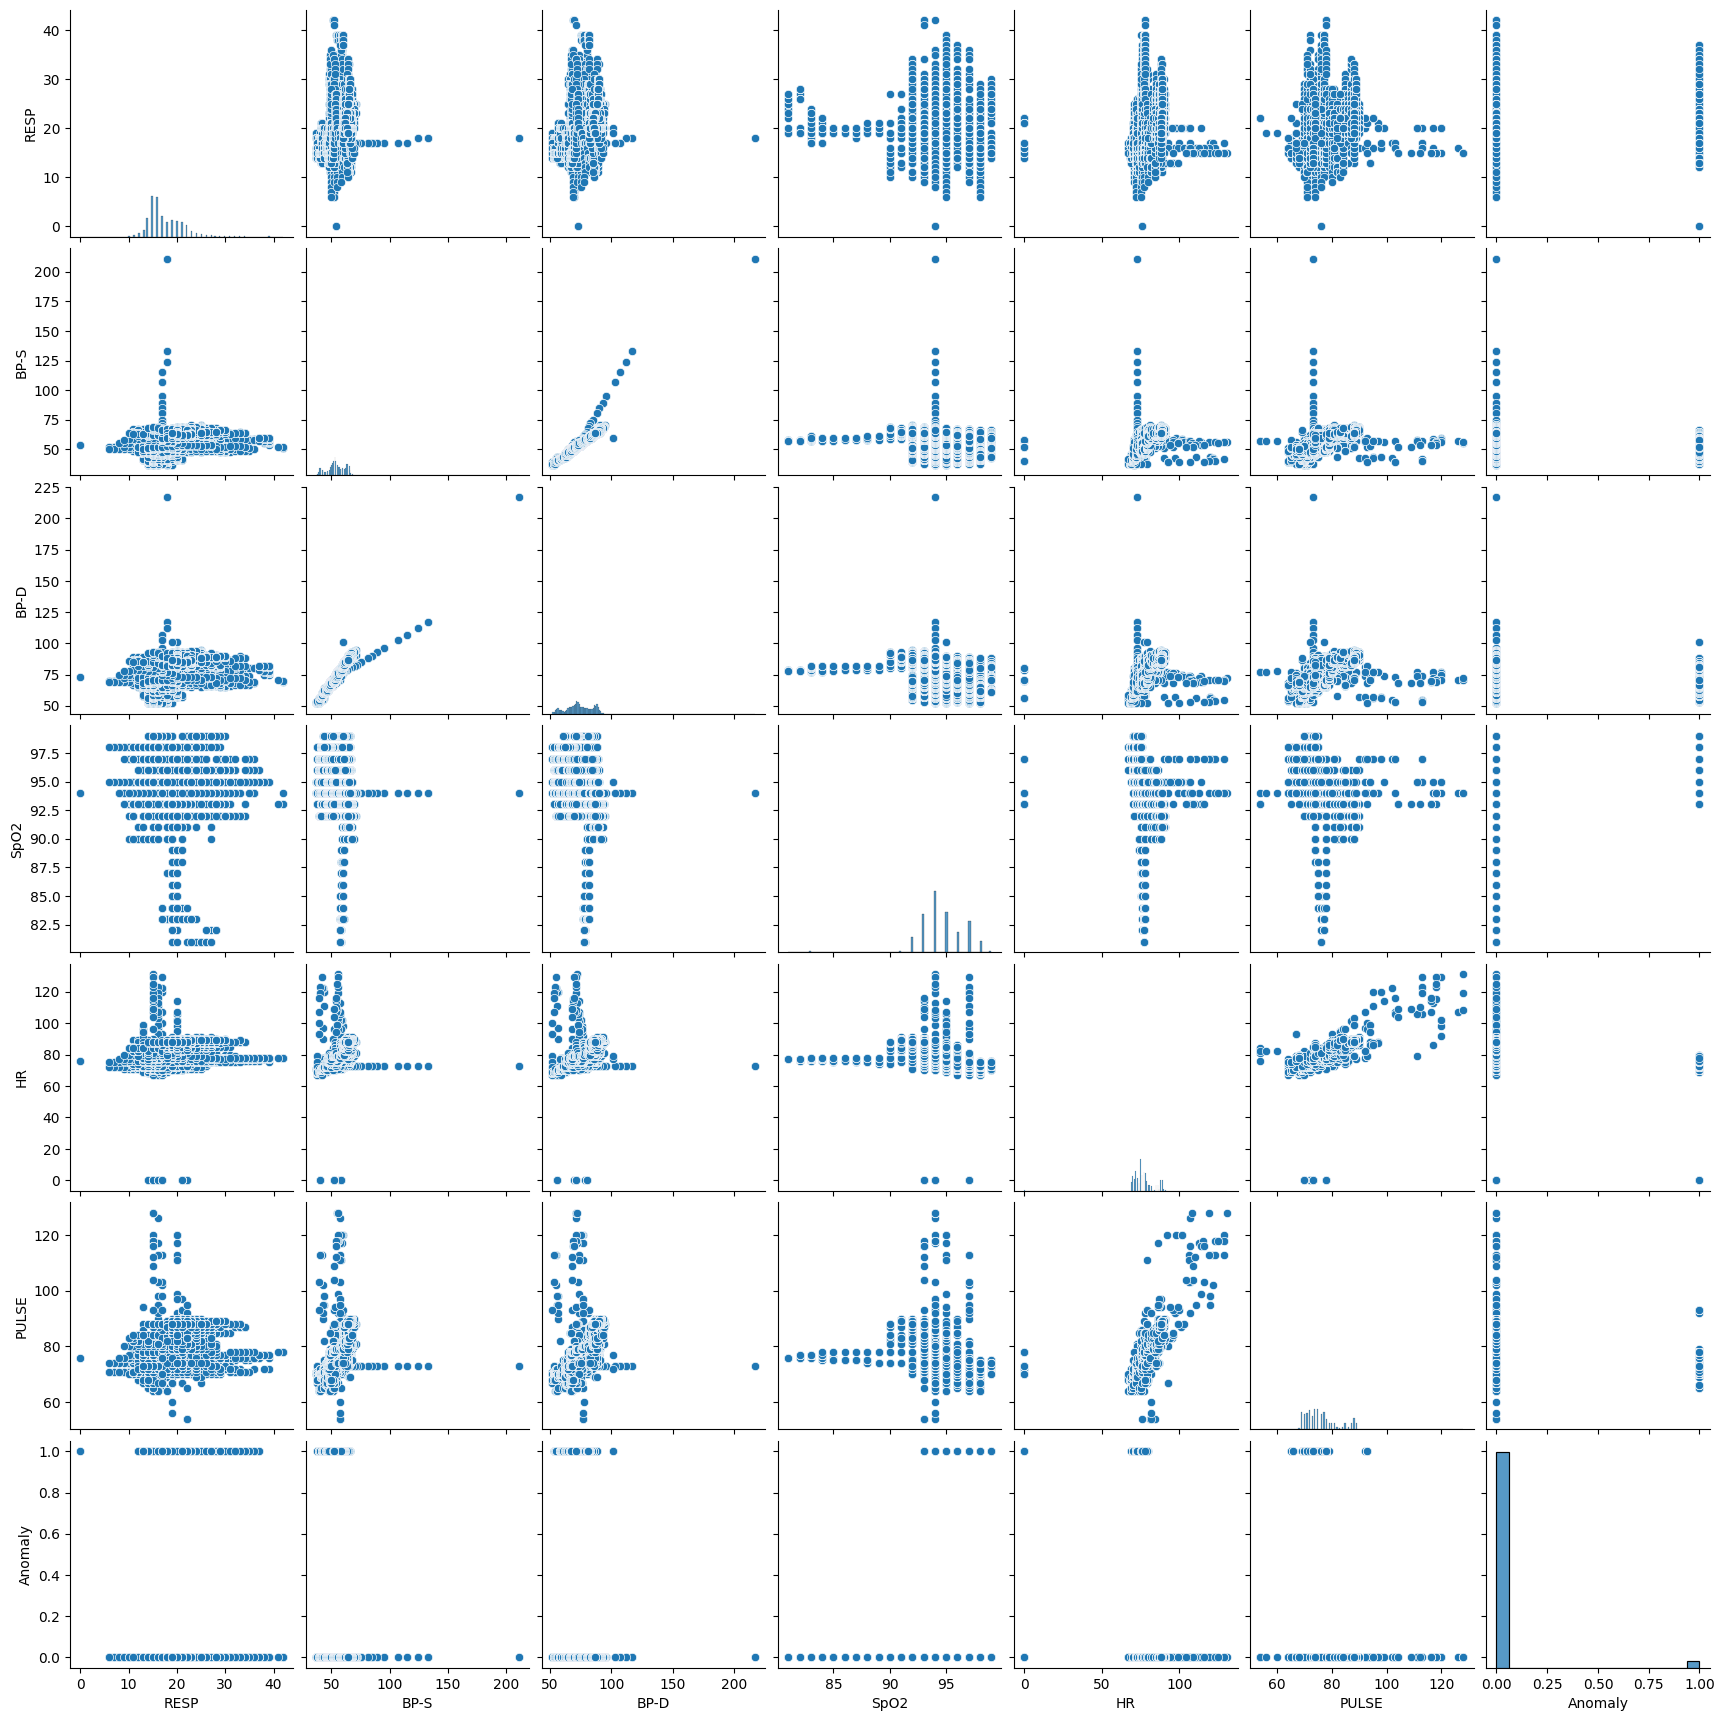

In [270]:
dataframe2 = pd.read_csv("230.csv")
sns.pairplot(dataframe2)


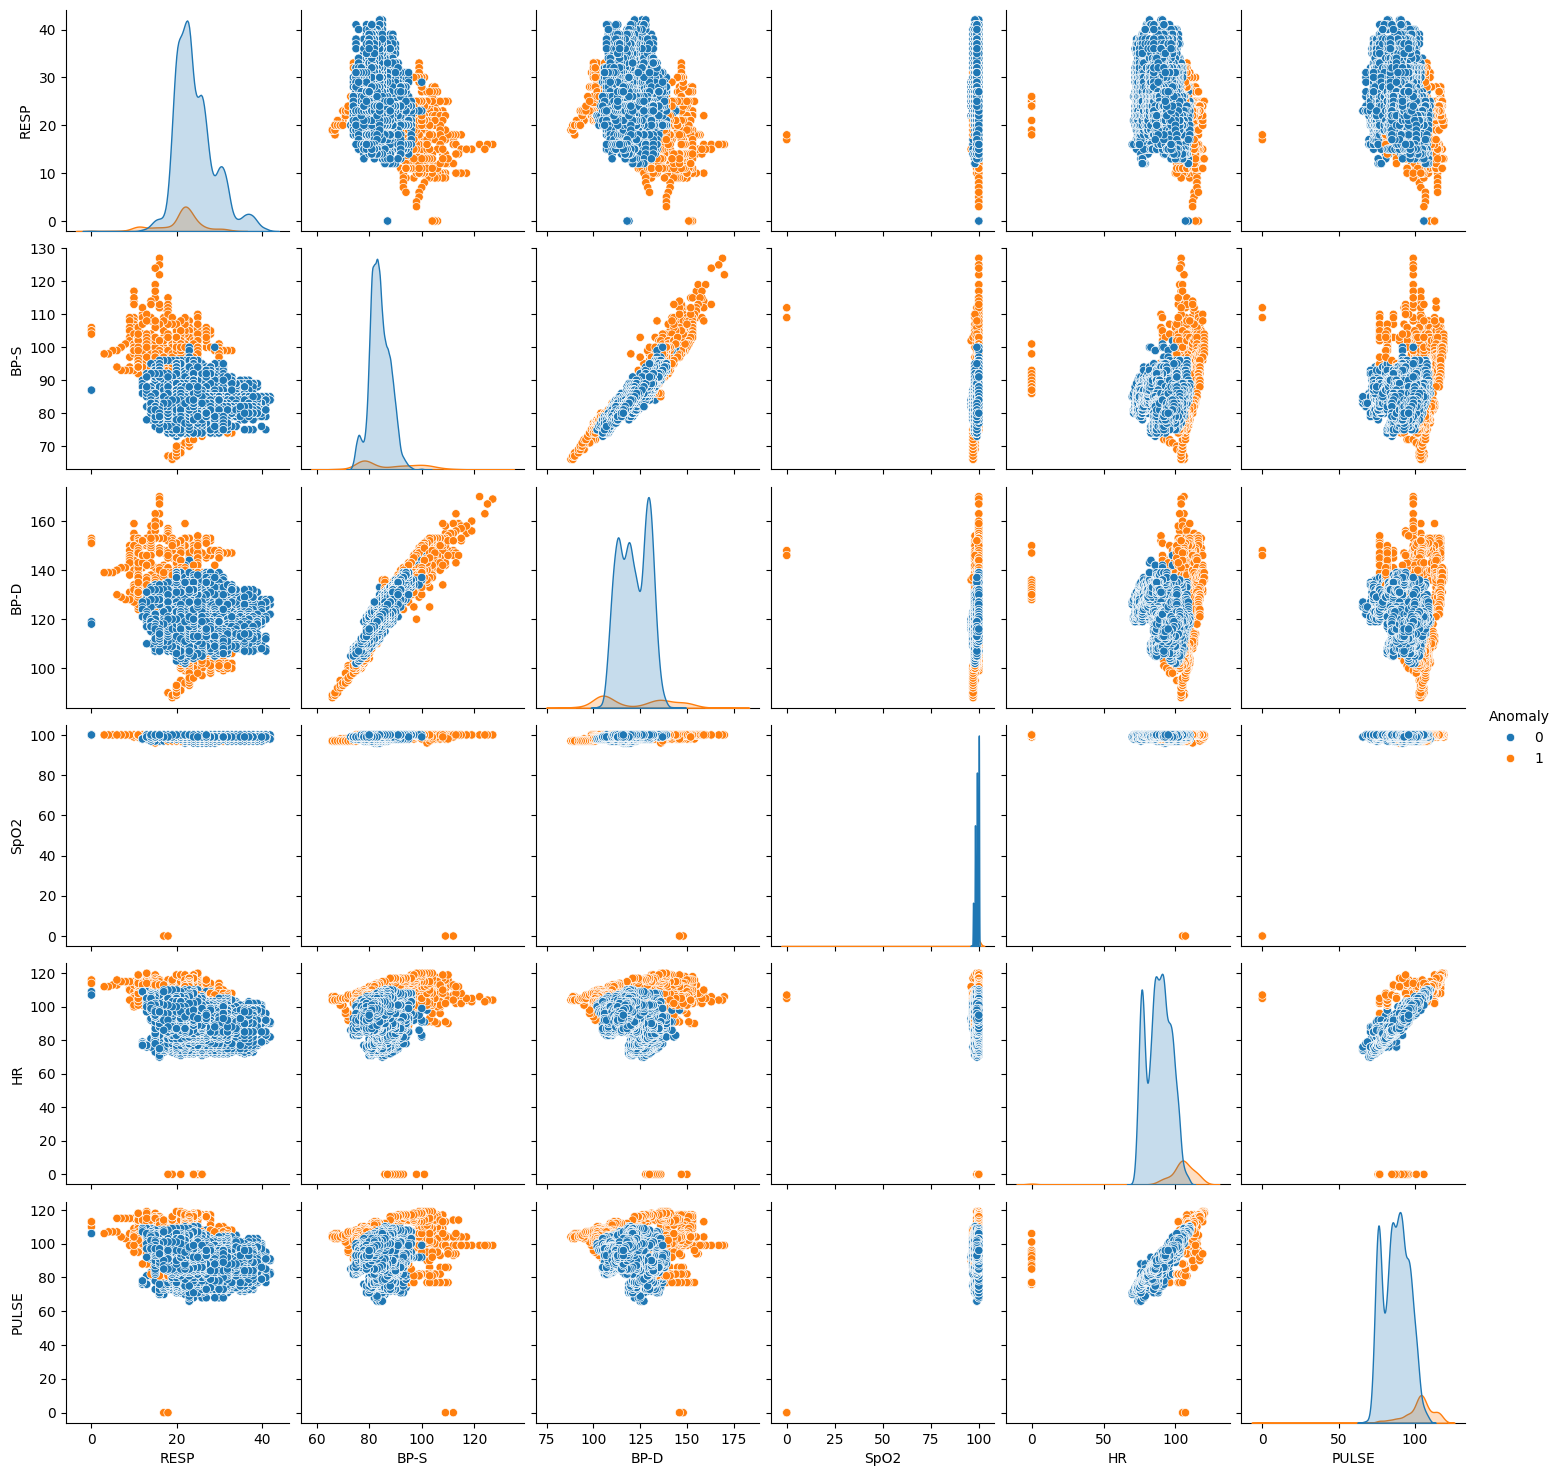

In [271]:
sns.pairplot(patient_221_cleaned, hue='Anomaly', diag_kind='kde')
plt.show()

#Using Gradient Boosted Decision Trees for the Data given by Paitent 2

In [272]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

In [273]:
dataframe_train_on_gbdt, dataframe_test_on_gbdt = train_test_split(patient_230_cleaned, test_size = 0.3, random_state = 69)

In [274]:
dataset_train_on_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(dataframe_train_on_gbdt, label="Anomaly")
dataset_test_on_gbdt = tfdf.keras.pd_dataframe_to_tf_dataset(dataframe_test_on_gbdt, label="Anomaly")

model_on_gbdt = tfdf.keras.GradientBoostedTreesModel()
model_on_gbdt.fit(dataset_train_on_gbdt)

prediction_probability_gbdt = model_on_gbdt.predict(dataset_test_on_gbdt)
prediction_gbdt = tf.argmax(prediction_probability_gbdt, axis=1)
prediction_test_gbdt = np.concatenate([y for x, y in dataset_test_on_gbdt], axis=0)

accuracy_of_gbdt = accuracy_score(prediction_test_gbdt, prediction_gbdt)
print(f"GBDT Accuracy: {accuracy_of_gbdt*100:.2f}%")

logloss_of_gbdt = log_loss(prediction_test_gbdt, prediction_probability_gbdt)
print(f"GBDT Log Loss: {logloss_of_gbdt:.4f}%")

Use /tmp/tmprh3c3vhm as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.321779. Found 5914 examples.
Training model...
Model trained in 0:00:01.068546
Compiling model...
Model compiled.
3/3 [==============================] - 0s 6ms/step
GBDT Accuracy: 95.82%
GBDT Log Loss: 0.0234%


Use /tmp/tmpe4q8nz5e as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.235247. Found 5914 examples.
Training model...
Model trained in 0:00:00.063373
Compiling model...
Model compiled.
3/3 [==============================] - 0s 6ms/step
Number of trees is: 5, and the Accuracy is: 95.82%, and the Log Loss is 0.0978
Use /tmp/tmpkt2yc1d5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.304865. Found 5914 examples.
Training model...
Model trained in 0:00:00.107375
Compiling model...
Model compiled.
3/3 [==============================] - 0s 8ms/step
Number of trees is: 10, and the Accuracy is: 95.82%, and the Log Loss is 0.0779
Use /tmp/tmpl5kwo84h as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.325490. Found 5914 examples.
Training model...
Model trained in 0:00:00.152808
Compiling model...
Model compiled.
3/3 [==============================] - 0s 8ms/step
Numb

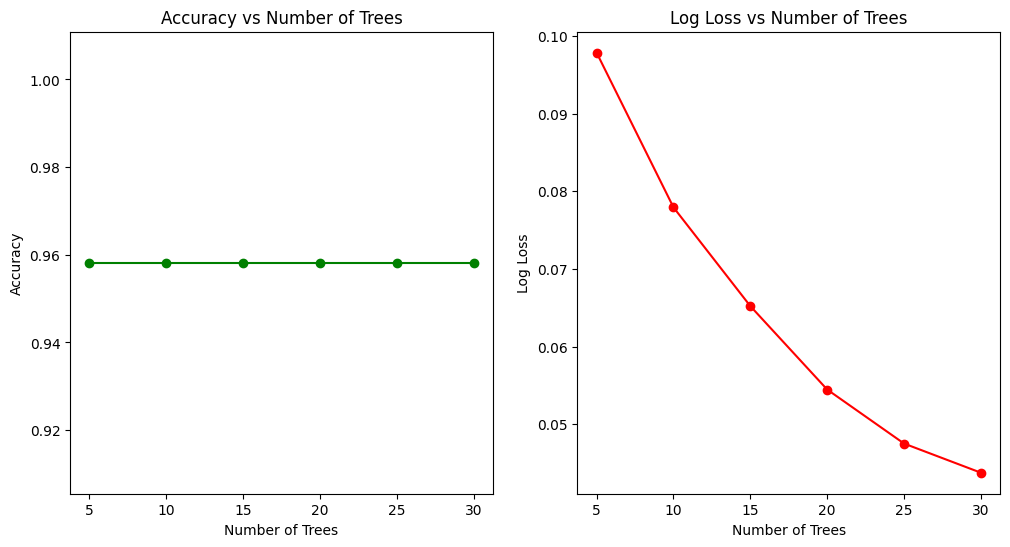

In [275]:
def gbdt_evaluation_for_comp(num_trees, dataset_train_on_gbdt, dataset_test_on_gbdt):
    model_on_gbdt = tfdf.keras.GradientBoostedTreesModel(num_trees=num_trees)
    model_on_gbdt.fit(dataset_train_on_gbdt)
    prediction_probability_test = model_on_gbdt.predict(dataset_test_on_gbdt)
    prediction_prob = tf.argmax(prediction_probability_test, axis=1)
    tests_gbdt = np.concatenate([y for x, y in dataset_test_on_gbdt], axis=0)
    acc_gbdt = accuracy_score(tests_gbdt,prediction_prob)
    lless_gbdt = log_loss(tests_gbdt,prediction_probability_test)
    return acc_gbdt,lless_gbdt

list_number_of_trees = [5,10,15,20,25,30]
gbdt_accuracies = []
gbdt_log_losses = []

for num_trees in list_number_of_trees:
    AAccuracy, LLogloss = gbdt_evaluation_for_comp(num_trees, dataset_train_on_gbdt, dataset_test_on_gbdt)
    gbdt_accuracies.append(AAccuracy)
    gbdt_log_losses.append(LLogloss)
    print(f"Number of trees is: {num_trees}, and the Accuracy is: {AAccuracy*100:.2f}%, and the Log Loss is {LLogloss:.4f}")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(list_number_of_trees, gbdt_accuracies, marker='o', color='g')
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(list_number_of_trees, gbdt_log_losses, marker='o', color='r')
plt.title('Log Loss vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')

plt.show()


In [276]:
final_results = pd.DataFrame({
    'Model Type':['GBDT (XGBoost)', 'Random Forest'],
    'Accuracy':[accuracy_of_gbdt, randomforest_accuracy],
    'Log Loss':[logloss_of_gbdt, randomforest_logloss]
})
print(final_results)

       Model Type  Accuracy  Log Loss
0  GBDT (XGBoost)  0.958185  0.023371
1   Random Forest  0.912363  0.025067
